In [259]:
import math
import random
from time import perf_counter
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from autograd.misc.optimizers import adam
import numdifftools as nd

In [260]:
io_values = [[(4.4793, -4.0765, -4.0765), 0], [(-4.1793, -4.9218, 1.7664), 1], [(-3.9429, -0.7689, 4.883), 1]]

In [261]:
#g(x) de la consigna
def g(x):
    try:
        return math.exp(x) / (1 + math.exp(x))
    except OverflowError:
        return 1

In [262]:
#Funcion dada por la consigna
def F(W, w, w0, E):
    return g(sum(
        W[j + 1] * g(sum(
            w[j][k] * E[k]
            for k in range(0, 3)
        ) - w0[j])
        for j in range(0, 2)
    ) - W[0])

In [263]:
#Error que se comete
def E(W, w, w0):
    return sum((OUT - F(W, w, w0, IN)) ** 2 for (IN, OUT) in io_values)

In [264]:
def E2(w,i=None,u=None):
    return E(w[:3],np.array([w[3:6],w[6:9]]),w[9:])

In [265]:
def from_x_to_W_w_w0(x):
    return x[:3], np.array([x[3:6],x[6:9]]), x[9:]

In [266]:
# x0 = np.array([random.uniform(0,1) for i in range(0,11)])
x0 = np.array([0 for i in range(0,11)])
errors = []
execution_times = []
W_w_w0 = []

In [267]:
#Gradiente descendiente
t0 = perf_counter()
result = optimize.minimize(E2,x0=x0,method='L-BFGS-B')
tf = perf_counter()

W, w, w0 = from_x_to_W_w_w0(result.x)
errors.append(result.fun)
execution_times.append((tf-t0)*1000)
W_w_w0.append((W, w, w0))

print(f'execution time: {(tf-t0)*1000}ms')
print(f'error: {result.fun}')
print(f'W: {W}\nw: {w}\nw0: {w0}')

execution time: 14.945400000215159ms
error: 5.141418296604767e-06
W: [6.33723342 6.61920307 6.61920307]
w: [[-6.33923132  1.6121689   5.44763473]
 [-6.33923132  1.6121689   5.44763473]]
w0: [0.23743733 0.23743733]


In [268]:
#Gradientes conjugados
t0 = perf_counter()
result = optimize.minimize(E2,x0=x0,method='CG')
tf = perf_counter()

W, w, w0 = from_x_to_W_w_w0(result.x)
errors.append(result.fun)
execution_times.append((tf-t0)*1000)
W_w_w0.append((W, w, w0))

print(f'execution time: {(tf-t0)*1000}ms')
print(f'error: {result.fun}')
print(f'W: {W}\nw: {w}\nw0: {w0}')

execution time: 56.0615999984293ms
error: 4.720771989600081e-06
W: [6.14978479 7.12182314 7.12182314]
w: [[-2.76091069  0.53929397  2.345937  ]
 [-2.76091069  0.53929397  2.345937  ]]
w0: [0.06283709 0.06283709]


In [269]:
#ADAM
t0 = perf_counter()
result = adam(nd.Gradient(E2),x0,step_size=0.80085)
tf = perf_counter()

W, w, w0 = from_x_to_W_w_w0(result)
errors.append(E2(result))
execution_times.append((tf-t0)*1000)
W_w_w0.append((W, w, w0))

print(f'execution time: {(tf-t0)*1000}ms')
print(f'error: {E2(result)}')
print(f'W: {W}\nw: {w}\nw0: {w0}')

execution time: 1917.4407999998948ms
error: 4.85993187425499e-06
W: [6.71950711 6.67986628 6.67986628]
w: [[-5.09303014  2.78224065  4.77093454]
 [-5.09303014  2.78224065  4.77093454]]
w0: [2.77913587 2.77913587]


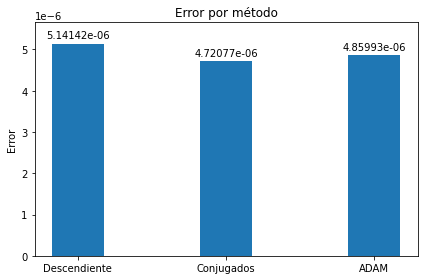

In [270]:
# Grafico error
labels = ['Descendiente', 'Conjugados', 'ADAM']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

b = ax.bar(labels, errors, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error')
ax.set_title('Error por método')
ax.set_xticks(x, labels)
ax.set_ylim(0, max(errors)*1.1)

ax.bar_label(b, padding=3)

fig.tight_layout()

plt.show()

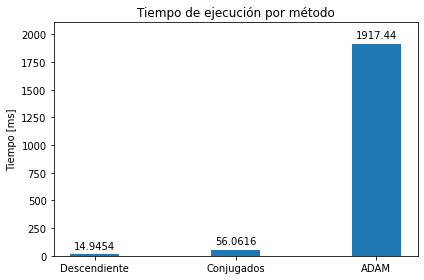

In [271]:
# Grafico tiempos de ejecucion
labels = ['Descendiente', 'Conjugados', 'ADAM']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

b = ax.bar(labels, execution_times, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Tiempo [ms]')
ax.set_title('Tiempo de ejecución por método')
ax.set_xticks(x, labels)
ax.set_ylim(0, max(execution_times)*1.1)

ax.bar_label(b, padding=3)

fig.tight_layout()

plt.show()

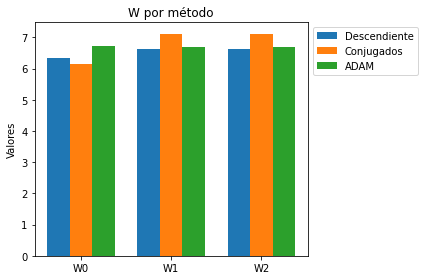

In [272]:
labels = ['W0', 'W1', 'W2']
W_list = [i[0] for i in W_w_w0]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, W_list[0], width, label='Descendiente')
rects2 = ax.bar(x, W_list[1], width, label='Conjugados')
rects3 = ax.bar(x + width, W_list[2], width, label='ADAM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Valores')
ax.set_title('W por método')
ax.set_xticks(x, labels)
h,l = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1, 1))

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()